In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils import data
from torch.autograd import Variable
import torch.nn.functional as F

In [1]:
import jieba

In [3]:
text = '深度学习（英语：deep learning)是机器学习的分支,是一种以人工神经网络为架构对数据进行表征学习的算法'
cuted = jieba.lcut(text)

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\11024\AppData\Local\Temp\jieba.cache
Loading model cost 1.300 seconds.
Prefix dict has been built successfully.


In [6]:
[cuted[i:i+2] for i in range(len(cuted)-1)]

[['深度', '学习'],
 ['学习', '（'],
 ['（', '英语'],
 ['英语', '：'],
 ['：', 'deep'],
 ['deep', ' '],
 [' ', 'learning'],
 ['learning', ')'],
 [')', '是'],
 ['是', '机器'],
 ['机器', '学习'],
 ['学习', '的'],
 ['的', '分支'],
 ['分支', ','],
 [',', '是'],
 ['是', '一种'],
 ['一种', '以'],
 ['以', '人工神经网络'],
 ['人工神经网络', '为'],
 ['为', '架构'],
 ['架构', '对'],
 ['对', '数据'],
 ['数据', '进行'],
 ['进行', '表征'],
 ['表征', '学习'],
 ['学习', '的'],
 ['的', '算法']]

In [3]:
b = torch.tensor([-2,-1,0,1,2])
F.relu(b)

tensor([0, 0, 0, 1, 2])

# torch.argmax函数说明
torch.argmax()函数

argmax函数：torch.argmax(input, dim=None, keepdim=False)返回指定维度最大值的序号，dim给定的定义是：the demention to reduce.也就是把dim这个维度的，变成这个维度的最大值的index。

1）dim的不同值表示不同维度。特别的在dim=0表示二维中的列，dim=1在二维矩阵中表示行。广泛的来说，我们不管一个矩阵是几维的，比如一个矩阵维度如下：(d0,d1,...,dn−1) ，那么dim=0就表示对应到d0 也就是第一个维度，dim=1表示对应到
也就是第二个维度，一次类推。


2）知道dim的值是什么意思还不行，还要知道函数中这个dim给出来会发生什么。

结合这两个才会知道dim在函数中的作用。下面举两个例子说明上面的第二点。

例子一：torch.argmax()函数中dim表示该维度会消失。
这个消失是什么意思？官方英文解释是：dim (int) – the dimension to reduce.
我们知道argmax就是得到最大值的序号索引，对于一个维度为(d0,d1) 的矩阵来说，我们想要求每一行中最大数的在该行中的列号，最后我们得到的就是一个维度为(d0,1) 的一矩阵。这时候，列就要消失了。

因此，我们想要求每一行最大的列标号，我们就要指定dim=1，表示我们不要列了，保留行的size就可以了。
假如我们想求每一列的最大行标，就可以指定dim=0，表示我们不要行了。

In [141]:

a=torch.tensor(
              [
                  [1, 5, 5, 2],
                  [9, -6, 2, 8],
                  [-3, 7, -9, 1]
              ])
b=torch.argmax(a,dim=0)
print(b)

tensor([1, 2, 0, 1])


In [144]:

a=torch.randn(10,45,35)
b=torch.argmax(a,dim=-1)
a

tensor([[[-0.0507,  3.1565, -0.1225,  ..., -1.1123,  0.9144, -0.0299],
         [ 0.8546,  0.5101,  0.6709,  ...,  0.0487, -1.4789,  0.4803],
         [-0.2002,  0.5877,  0.9942,  ..., -0.2248,  1.4009,  0.6243],
         ...,
         [ 0.8035,  1.7767,  0.7535,  ...,  2.6316, -0.7831,  0.4345],
         [ 0.1673, -0.7158,  0.5009,  ...,  1.5412,  2.1190,  2.2826],
         [-0.0864,  0.2303, -0.1305,  ...,  1.3734,  0.0132,  1.7855]],

        [[ 1.2318,  0.2859,  0.3438,  ..., -0.1064,  1.7126, -1.1934],
         [-0.4377, -1.5372, -0.0329,  ..., -0.5671,  0.1183,  0.4995],
         [ 0.3354, -0.6357,  1.3657,  ...,  0.8461, -0.0536,  0.2563],
         ...,
         [ 0.5269, -0.9534, -0.8335,  ...,  0.1606,  1.8366, -1.0151],
         [ 0.8334,  0.5718, -0.0487,  ...,  0.3361, -0.3937,  0.2168],
         [-1.5929, -0.5038, -0.6126,  ..., -0.9856,  2.3434,  0.4809]],

        [[-0.8854, -1.2100,  1.3532,  ...,  0.1073,  1.1139,  0.0481],
         [ 0.5103,  1.8720,  0.0788,  ..., -1

In [145]:
b

tensor([[ 1, 17, 12, 19, 14, 26, 20, 13, 19, 31,  7,  9, 19, 12, 12,  1, 22,  2,
         19,  9, 17, 33,  2,  3, 11, 25, 32, 21, 18, 19, 16,  9, 21,  4, 26, 19,
         17,  0, 30,  8, 25,  8, 28, 34, 31],
        [14, 21, 12, 28, 23,  6,  7, 17,  5, 15,  3,  9,  0, 20, 13, 17, 15,  0,
         31, 11, 20,  7, 19,  0, 27,  1, 18, 28,  9, 34,  5, 30, 15, 12,  9, 20,
         16,  2, 25, 19,  7, 23,  3, 22, 26],
        [27,  1, 11, 26, 32, 11, 10, 20,  0, 10, 27, 19, 25, 32, 10, 23, 26, 17,
         33, 15,  7, 28, 18, 25,  1, 28, 20,  8, 11, 20, 25, 17, 16,  3, 16,  7,
         20, 22, 34, 21, 13, 21,  5, 20,  4],
        [31, 15, 11, 25, 26, 21, 10, 20, 32, 20, 28, 13, 22, 29, 30, 25, 26,  0,
          2,  3, 33, 30, 14,  0, 10, 12, 15,  1,  8,  1,  8, 33, 10, 10, 27,  7,
         15, 20,  8,  3,  6, 13, 13, 18, 14],
        [34, 33, 27, 24,  6,  5, 22,  6, 11, 31, 14, 29, 31, 16, 32,  9, 14, 13,
         16,  1, 16,  8, 34,  0, 31, 31, 31, 20, 15, 31, 20, 25, 11, 11, 18, 31,
      

## torch.bmm() 与 torch.matmul()
torch.bmm()强制规定维度和大小相同

torch.matmul()没有强制规定维度和大小，可以用利用广播机制进行不同维度的相乘操作

当进行操作的两个tensor都是3D时，两者等同。

### 
torch.bmm()是tensor中的一个相乘操作，类似于矩阵中的A*B。

参数：input，mat2：两个要进行相乘的tensor结构，两者必须是3D维度的，每个维度中的大小是相同的。

output：输出结果

并且相乘的两个矩阵，要满足一定的维度要求：input（p,m,n) * mat2(p,n,a) ->output(p,m,a)。这个要求，可以类比于矩阵相乘。前一个矩阵的列等于后面矩阵的行才可以相乘。


In [2]:
c = torch.randn((2,2,5))
print (c)

tensor([[[-1.1912, -0.2941,  0.0495, -1.9024, -0.2066],
         [-0.7716,  1.8078, -0.1648,  2.3963, -0.6913]],

        [[ 0.0175,  0.7192, -0.0283, -0.2530,  0.1925],
         [ 0.5540, -0.3659,  0.9093, -0.0889, -1.0551]]])


In [3]:
d = torch.reshape(c,(2,5,2))
print (d)

tensor([[[-1.1912, -0.2941],
         [ 0.0495, -1.9024],
         [-0.2066, -0.7716],
         [ 1.8078, -0.1648],
         [ 2.3963, -0.6913]],

        [[ 0.0175,  0.7192],
         [-0.0283, -0.2530],
         [ 0.1925,  0.5540],
         [-0.3659,  0.9093],
         [-0.0889, -1.0551]]])


In [4]:
e = torch.bmm(c,d)
print(e)

tensor([[[-2.5403,  1.3280],
         [ 3.7181, -3.0022]],

        [[ 0.0499, -0.6181],
         [ 0.3214,  2.0271]]])


In [5]:
e.size()

torch.Size([2, 2, 2])

## torch.matmul()
torch.matmul(input, other, out=None) → Tensor

 torch.matmul()也是一种类似于矩阵相乘操作的tensor联乘操作。但是它可以利用python 中的广播机制，处理一些维度不同的tensor结构进行相乘操作。这也是该函数与torch.bmm()区别所在。参数：

input,other：两个要进行操作的tensor结构

output:结果

In [6]:
'''若两个都是1D（向量）的，则返回两个向量的点积'''
x = torch.rand(2)
y = torch.rand(2)
print(torch.matmul(x,y),torch.matmul(x,y).size())

tensor(0.2931) torch.Size([])


In [7]:
'''若两个都是2D（矩阵）的，则按照（矩阵相乘）规则返回2D'''
x = torch.rand(2,4)
y = torch.rand(4,3) ###维度也要对应才可以乘
print(torch.matmul(x,y),'\n',torch.matmul(x,y).size())

tensor([[0.9911, 1.6114, 1.4311],
        [0.7890, 1.0214, 0.8716]]) 
 torch.Size([2, 3])


In [8]:
'''若input维度1D，other维度2D，则先将1D的维度扩充到2D（1D的维数前面+1），
然后得到结果后再将此维度去掉，得到的与input的维度相同。即使作扩充（广播）处理，
input的维度也要和other维度做对应关系。'''
x = torch.rand(4) #1D
y = torch.rand(4,3) #2D
print(x.size())
print(y.size())
print(torch.matmul(x,y),'\n',torch.matmul(x,y).size())

### 扩充x =>(,4) 
### 相乘x(,4) * y(4,3) =>(,3) 
### 去掉1D =>(3)


torch.Size([4])
torch.Size([4, 3])
tensor([0.6495, 0.9176, 1.3733]) 
 torch.Size([3])


In [9]:
'''如果一个维度至少是1D，另外一个大于2D，则返回的是一个批矩阵乘法（ a batched matrix multiply）'''
x = torch.randn(2, 3, 4)
y = torch.randn(3)
print(torch.matmul(y, x),'\n',torch.matmul(y, x).size()) #1D*3D

tensor([[ 3.6362, -1.1798, -1.0108, -5.3773],
        [-0.6950, -0.1795,  0.7154,  1.2766]]) 
 torch.Size([2, 4])


In [10]:
x = torch.randn(2, 3, 4)
y = torch.randn(4)
 
print(torch.matmul(x, y),'\n',torch.matmul(x, y).size()) # 3D*1D

tensor([[-0.6739, -0.0360,  0.3158],
        [-3.4001, -1.0112,  2.8408]]) 
 torch.Size([2, 3])


In [11]:
'''若input和other都是3D的，则与torch.bmm()函数功能一样'''
x = torch.randn(2,2,4)
y = torch.randn(2,4,5)
 
print(torch.matmul(x, y).size(),'\n',torch.bmm(x, y).size())
print(torch.equal(torch.matmul(x,y),torch.bmm(x,y)))

torch.Size([2, 2, 5]) 
 torch.Size([2, 2, 5])
True


In [12]:
'''如果input中某一维度满足可以广播（扩充），那么也是可以进行相乘操作的。
例如 input（j,1,n,m）*  other (k,m,p)  = output(j,k,n,p)。'''
import torch
x = torch.randn(10,1,2,4)
y = torch.randn(2,4,5)
 
print(torch.matmul(x, y).size())

torch.Size([10, 2, 2, 5])


## torch.cat() 函数用法
使用torch.cat((A,B),dim)时，除拼接维数dim数值可不同外其余维数数值需相同，方能对齐。

In [80]:
A=torch.ones(2,3) #2x3的张量（矩阵）
A

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [81]:
B=2*torch.ones(4,3)
B

tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])

In [82]:
 C=torch.cat((A,B),0)#按维数0（行）拼接
C

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])

In [83]:
C.size()#[4+2=6,3]

torch.Size([6, 3])

In [84]:
D=2*torch.ones(2,4) #2x4的张量（矩阵）
D

tensor([[2., 2., 2., 2.],
        [2., 2., 2., 2.]])

In [86]:
C=torch.cat((A,D),1)#按维数1（列）拼接
C

tensor([[1., 1., 1., 2., 2., 2., 2.],
        [1., 1., 1., 2., 2., 2., 2.]])

## pytorch通过torch.sparse实现稀疏张量
什么是稀疏张量？在矩阵中，若数值为0的元素数目远远多于非0元素的数目，并且非0元素分布没有规律时，则称该矩阵为稀疏矩阵；与之相反，若非0元素数目占大多数时，则称该矩阵为稠密矩阵。定义非零元素的总数比上矩阵所有元素的总数为矩阵的稠密度。

In [17]:
'''构造空的稀疏张量'''
print(torch.sparse.FloatTensor(2,3))

tensor(indices=tensor([], size=(2, 0)),
       values=tensor([], size=(0,)),
       size=(2, 3), nnz=0, layout=torch.sparse_coo)


## 构造稀疏张量
稀疏张量被表示为一对致密张量：一维张量和二维张量的索引。可以通过提供这两个张量来构造稀疏张量，以及稀疏张量的大小（不能从这些张量推断出！）假设我们要在位置（0,2）处定义具有条目3的稀疏张量， ，位置（1，0）的条目4，位置（1,2）的条目5。我们会写：

In [18]:
i = torch.LongTensor([[0, 1, 1],
                      [2, 0, 2]])
v = torch.FloatTensor([3, 4, 5])
print (torch.sparse.FloatTensor(i, v, torch.Size([2,3])).to_dense())

tensor([[0., 0., 3.],
        [4., 0., 5.]])


In [19]:
print(v)

tensor([3., 4., 5.])


## tensor 和Tensor的区别

In [20]:
a=torch.tensor(1)
a

tensor(1)

In [21]:
a.type()

'torch.LongTensor'

In [22]:
b = torch.Tensor(1)
b

tensor([0.])

In [23]:
b.type()

'torch.FloatTensor'

In [24]:
c=torch.LongTensor(1)
c

tensor([8026363888824579189])

In [25]:
c.type()

'torch.LongTensor'

## pytorch nn.init 中实现的初始化函数 uniform, normal, const, Xavier, He initialization

### 分布函数·
'''1. 均匀分布'''
torch.nn.init.uniform_(tensor, a=0, b=1)
服从~U(a,b)

'''2. 正太分布'''
torch.nn.init.normal_(tensor, mean=0, std=1)
服从~N (mean,std) 

'''3. 初始化为常数'''
torch.nn.init.constant_(tensor, val)
初始化整个矩阵为常数val

## nn.Embedding
torch.nn.Embedding(num_embeddings, embedding_dim, padding_idx=None, max_norm=None, norm_type=2.0, scale_grad_by_freq=False, sparse=False, _weight=None)

其为一个简单的存储固定大小的词典的嵌入向量的查找表，意思就是说，给一个编号，嵌入层就能返回这个编号对应的嵌入向量，嵌入向量反映了各个编号代表的符号之间的语义关系。

输入为一个编号列表，输出为对应的符号嵌入向量列表。

参数解释

num_embeddings (python:int) – 词典的大小尺寸，比如总共出现5000个词，那就输入5000。此时index为（0-4999）

embedding_dim (python:int) – 嵌入向量的维度，即用多少维来表示一个符号。

padding_idx (python:int, optional) – 填充id，比如，输入长度为100，但是每次的句子长度并不一样，后面就需要用统一的数字填充，而这里就是指定这个数字，这样，网络在遇到填充id时，就不会计算其与其它符号的相关性。（初始化为0）

max_norm (python:float, optional) – 最大范数，如果嵌入向量的范数超过了这个界限，就要进行再归一化。

norm_type (python:float, optional) – 指定利用什么范数计算，并用于对比max_norm，默认为2范数。

scale_grad_by_freq (boolean, optional) – 根据单词在mini-batch中出现的频率，对梯度进行放缩。默认为False.

sparse (bool, optional) – 若为True,则与权重矩阵相关的梯度转变为稀疏张量。

变量
~Embedding.weight (Tensor) –形状为 (num_embeddings, embedding_dim) 的学习权重采用标准正态分布N(0,1)进行初始化


I/O形状
输入: (∗) , 包含提取的编号的任意形状的长整型张量。

输出: (∗,H) , 其中 * 为输入的形状，H为embedding_dim

一些注意的点:
 nn.embedding的输入只能是编号，不能是隐藏变量，比如one-hot，或者其它，这种情况，可以自己建一个自定义维度的线性网络层，参数训练可以单独训练或者跟随整个网络一起训练（看实验需要）
 
如果你指定了padding_idx，注意这个padding_idx也是在num_embeddings尺寸内的，比如符号总共有500个，指定了padding_idx，那么num_embeddings应该为501

embedding_dim的选择要注意，根据自己的符号数量，举个例子，如果你的词典尺寸是1024，那么极限压缩（用二进制表示）也需要10维，再考虑词性之间的相关性，怎么也要在15-20维左右，虽然embedding是用来降维的，但是也要注意这种极限维度，结合实际情况，合理定义

In [48]:
word_to_ix = {'hello':0,"world":1}
embeds = nn.Embedding(2,5)
hello_idx = torch.LongTensor([word_to_ix['hello']])
hello_idx = Variable(hello_idx)
hello_embed = embeds(hello_idx)
print(hello_embed)

tensor([[ 0.7832, -0.1528, -0.3995,  0.0221,  1.5177]],
       grad_fn=<EmbeddingBackward>)


In [43]:
hell0_0 = torch.LongTensor([word_to_ix['hello']])
hell0_0

tensor([0])

In [44]:
hello_1 = Variable(hell0_0)
hello_1

tensor([0])

In [61]:
word_to_ix = {'hello':0,"world":1}
embeds = nn.Embedding(2,5)
world_idx = torch.LongTensor([word_to_ix['world']])
world_idx = Variable(hello_idx)
world_embed = embeds(hello_idx)
print(world_embed)


tensor([[ 1.7316,  0.1431,  1.6642, -0.0410,  0.3679]],
       grad_fn=<EmbeddingBackward>)


In [62]:
print(world_embed.sum(0))

tensor([ 1.7316,  0.1431,  1.6642, -0.0410,  0.3679], grad_fn=<SumBackward1>)


## torch.nn.Functional.softmax()

对n维输入张量运用Softmax函数，将张量的每个元素缩放到（0,1）区间且和为1。Softmax函数定义如下：

参数：

　　dim:指明维度，dim=0表示按列计算；dim=1表示按行计算。默认dim的方法已经弃用了，最好声明dim，否则会警告：

UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
shape：

输入：(N, L)
输出：(N, L)
返回结果是一个与输入维度dim相同的张量，每个元素的取值范围在（0,1）区间。

In [100]:
a=torch.rand(3,4,5)
b=F.softmax(a,dim=0)#行相加为1
c=F.softmax(a,dim=1)#列相加为1
d=F.softmax(a,dim=2)

In [101]:
a

tensor([[[0.3783, 0.2270, 0.9079, 0.1629, 0.6276],
         [0.6131, 0.6956, 0.7968, 0.9115, 0.8882],
         [0.9051, 0.9833, 0.3628, 0.5687, 0.5645],
         [0.9532, 0.9137, 0.0150, 0.2194, 0.0024]],

        [[0.2523, 0.0413, 0.1589, 0.5754, 0.0428],
         [0.3193, 0.6116, 0.5188, 0.9125, 0.7823],
         [0.4550, 0.3728, 0.7358, 0.6593, 0.2157],
         [0.4065, 0.1797, 0.3456, 0.5892, 0.4806]],

        [[0.1493, 0.9918, 0.8847, 0.9445, 0.8184],
         [0.1137, 0.0351, 0.3952, 0.0972, 0.0993],
         [0.8928, 0.8284, 0.2603, 0.3176, 0.5357],
         [0.1225, 0.3313, 0.3514, 0.1266, 0.4822]]])

In [102]:
b

tensor([[[0.3736, 0.2513, 0.4082, 0.2130, 0.3613],
         [0.4251, 0.4105, 0.4121, 0.4092, 0.4248],
         [0.3809, 0.4167, 0.2981, 0.3481, 0.3735],
         [0.4964, 0.4906, 0.2637, 0.2977, 0.2365]],

        [[0.3293, 0.2087, 0.1930, 0.3217, 0.2014],
         [0.3169, 0.3774, 0.3121, 0.4096, 0.3822],
         [0.2428, 0.2263, 0.4328, 0.3811, 0.2635],
         [0.2873, 0.2355, 0.3671, 0.4309, 0.3815]],

        [[0.2971, 0.5400, 0.3988, 0.4653, 0.4373],
         [0.2580, 0.2121, 0.2758, 0.1812, 0.1930],
         [0.3763, 0.3569, 0.2690, 0.2708, 0.3629],
         [0.2163, 0.2740, 0.3692, 0.2713, 0.3821]]])

In [103]:
c

tensor([[[0.1744, 0.1489, 0.3467, 0.1763, 0.2651],
         [0.2205, 0.2379, 0.3103, 0.3727, 0.3441],
         [0.2953, 0.3172, 0.2010, 0.2645, 0.2489],
         [0.3098, 0.2959, 0.1420, 0.1865, 0.1419]],

        [[0.2242, 0.1883, 0.1845, 0.2221, 0.1714],
         [0.2397, 0.3331, 0.2645, 0.3111, 0.3592],
         [0.2745, 0.2623, 0.3286, 0.2415, 0.2038],
         [0.2616, 0.2163, 0.2224, 0.2252, 0.2656]],

        [[0.1983, 0.3636, 0.3656, 0.4159, 0.3384],
         [0.1914, 0.1397, 0.2241, 0.1783, 0.1649],
         [0.4172, 0.3088, 0.1958, 0.2222, 0.2550],
         [0.1931, 0.1878, 0.2145, 0.1836, 0.2418]]])

In [104]:
d

tensor([[[0.1771, 0.1522, 0.3007, 0.1428, 0.2272],
         [0.1680, 0.1825, 0.2019, 0.2264, 0.2212],
         [0.2446, 0.2645, 0.1422, 0.1747, 0.1740],
         [0.3106, 0.2986, 0.1216, 0.1491, 0.1200]],

        [[0.2035, 0.1648, 0.1854, 0.2812, 0.1651],
         [0.1437, 0.1925, 0.1754, 0.2601, 0.2283],
         [0.1901, 0.1751, 0.2518, 0.2332, 0.1497],
         [0.1994, 0.1589, 0.1876, 0.2394, 0.2147]],

        [[0.1044, 0.2425, 0.2179, 0.2313, 0.2039],
         [0.1916, 0.1771, 0.2539, 0.1885, 0.1889],
         [0.2680, 0.2513, 0.1424, 0.1508, 0.1875],
         [0.1687, 0.2079, 0.2121, 0.1694, 0.2418]]])

# torch.matmul和torch.mm和*区别

## 1.a * b，要求两个矩阵维度完全一致，即两个矩阵对应元素相乘，输出的维度也和原矩阵维度相同：


In [130]:
a = torch.randn(2,3)
b = torch.randn(2,3)
print(a)


tensor([[0.2016, 1.0752, 1.2720],
        [1.7327, 0.6216, 0.5495]])


In [131]:
b

tensor([[-0.0035,  2.3888,  0.0118],
        [-1.9447, -0.2052, -0.0535]])

In [132]:
c = a * b
c

tensor([[-6.9836e-04,  2.5684e+00,  1.5040e-02],
        [-3.3695e+00, -1.2754e-01, -2.9387e-02]])

In [135]:
a = torch.randn(10,45,3,150)
b = torch.randn(10,45,3,1)
c=torch.mul(a,b)
c.size()

torch.Size([10, 45, 3, 150])

## 2.torch.mm(a,b)，要求两个矩阵维度是（n×m）和（m×p），即普通二维矩阵乘法

In [114]:

a = torch.randn(2,3)
b = torch.randn(3,2)
a

tensor([[ 0.4299, -1.9049, -1.2430],
        [-0.9601, -0.3914,  0.3194]])

In [115]:
b

tensor([[ 0.2237, -1.0325],
        [-0.0828,  1.3004],
        [-1.5258,  1.3109]])

In [116]:
c = torch.mm(a,b)
c

tensor([[ 2.1505, -4.5504],
        [-0.6697,  0.9010]])

In [117]:
c.size()

torch.Size([2, 2])

## 3.torch.matul(a,b)，matmul可以进行张量乘法，输入可以是高维，当输入是多维时，把多出的一维作为batch提出来，其他部分做矩阵乘法

In [118]:
a = torch.randn(5,3,4)
b = torch.randn(4,2)
a

tensor([[[-0.1778, -1.8281,  0.0349,  0.7870],
         [ 0.6607,  0.3055, -0.9301,  1.4361],
         [-0.0333, -0.8831, -0.8441,  0.0711]],

        [[ 0.7931,  0.2878, -1.6983, -0.5097],
         [-0.8375,  0.0132, -1.1531,  1.8372],
         [-0.1430, -0.0403,  1.2021, -2.2361]],

        [[ 0.9841, -0.6637, -0.3836,  1.7556],
         [-0.0116,  1.1695,  0.5287, -0.3386],
         [ 1.3123,  0.7058,  0.0612,  1.2197]],

        [[ 1.2811, -1.8927,  0.1022,  1.6136],
         [ 0.5823,  3.0359, -0.4347, -0.5464],
         [-0.8674,  0.0714, -0.6749,  0.7755]],

        [[-0.7319, -0.7105,  1.2562, -0.9517],
         [-0.5327, -1.0378,  0.6527, -0.8125],
         [-0.1975, -1.5991,  0.6243,  1.3544]]])

In [119]:
b

tensor([[ 1.2540,  1.1974],
        [ 0.1955, -0.8339],
        [ 0.2640, -0.0046],
        [-1.0732,  1.3390]])

In [121]:
c = torch.matmul(a,b)
c

tensor([[[-1.4158,  2.3651],
         [-0.8985,  2.4636],
         [-0.5136,  0.7957]],

        [[ 1.1494,  0.0349],
         [-3.3238,  1.4513],
         [ 2.5300, -3.1372]],

        [[-0.8810,  4.0843],
         [ 0.7170, -1.4449],
         [ 0.4909,  2.6157]],

        [[-0.4682,  5.2724],
         [ 1.7954, -2.5640],
         [-2.0841, -0.0568]],

        [[ 0.2964, -1.5640],
         [ 0.1734, -0.8634],
         [-1.8490,  2.9077]]])

In [122]:
c.size()

torch.Size([5, 3, 2])

In [123]:
a = torch.randn(2,5,3)
b = torch.randn(1,3,4)
c = torch.matmul(a,b)
c.size()

torch.Size([2, 5, 4])

In [124]:
a = torch.randn(10,45,45)
b = torch.randn(10,45,45)
c = torch.matmul(a,b)
c.size()

torch.Size([10, 45, 45])

## torch.nn.LSTM()

输入的参数列表包括:

input_size 输入数据的特征维数，通常就是embedding_dim(词向量的维度)

hidden_size　LSTM中隐层的维度

num_layers　循环神经网络的层数

bias　用不用偏置，default=True

batch_first 这个要注意，通常我们输入的数据shape=(batch_size,seq_length,embedding_dim),而batch_first默认是False,所以我们的输入数据最好送进LSTM之前将batch_size与seq_length这两个维度调换

dropout　默认是0，代表不用dropout

bidirectional默认是false，代表不用双向LSTM

输入数据包括input,(h_0,c_0):

input就是shape==(seq_length,batch_size,input_size)的张量

h_0的shape==(num_layers*num_directions,batch,hidden_size)的张量，它包含了在当前这个batch_size中每个句子的初始隐藏状态，num_layers就是LSTM的层数，如果bidirectional=True,num_directions=2,否则就是１，表示只有一个方向，

c_0和h_0的形状相同，它包含的是在当前这个batch_size中的每个句子的初始细胞状态。h_0,c_0如果不提供，那么默认是０

输出数据包括output,(h_n,c_n):

output的shape==(seq_length,batch_size,num_directions*hidden_size),
它包含的LSTM的最后一层的输出特征(h_t),ｔ是batch_size中每个句子的长度.

h_n.shape==(num_directions * num_layers,batch,hidden_size)
c_n.shape==h_n.shape
h_n包含的是句子的最后一个单词的隐藏状态，c_n包含的是句子的最后一个单词的细胞状态，所以它们都与句子的长度seq_length无关。

## 
batch_first 这个要注意，通常我们输入的数据shape=(batch_size,seq_length,embedding_dim),而batch_first默认是False,所以我们的输入数据最好送进LSTM之前将batch_size与seq_length这两个维度调换，如果batch_first=true，则输入的shape为[batchsize,seq_length,input_Size]

## 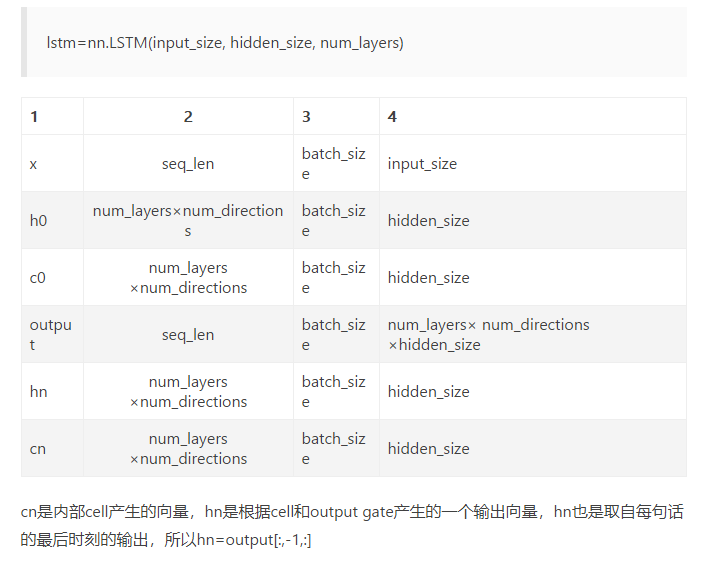

In [109]:
lstm=nn.LSTM(10,20,5,bidirectional=True)
batch1=torch.randn(50,3,10)
outputs,(h,c)=lstm(batch1)
outputs.size()


torch.Size([50, 3, 40])

## PyTorch中tensor.repeat()的使用
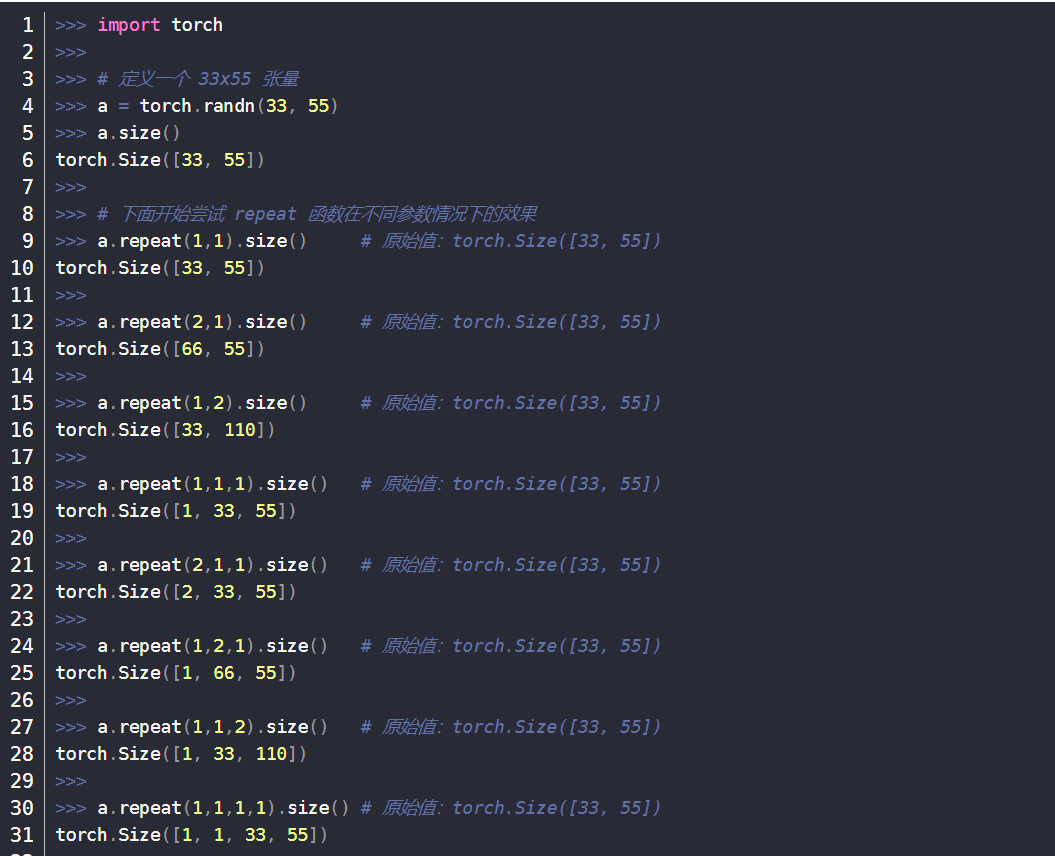

## torch.stack()
使用stack可以保留两个信息：[1. 序列] 和 [2. 张量矩阵] 信息，属于【扩张再拼接】的函数；可以认为把一个个矩阵按时间序列压紧成一个矩阵。 常出现在自然语言处理（NLP）和图像卷积神经网络(CV)中。


官方解释：沿着一个新维度对输入张量序列进行连接。 序列中所有的张量都应该为相同形状。

浅显说法：把多个2维的张量凑成一个3维的张量；多个3维的凑成一个4维的张量…以此类推，也就是在增加新的维度进行堆叠。

outputs = torch.stack(inputs, dim=?) → Tensor

In [51]:
# 假设是时间步T1的输出
T1 = torch.tensor([[1, 2, 3],
        		[4, 5, 6],
        		[7, 8, 9]])
# 假设是时间步T2的输出
T2 = torch.tensor([[10, 20, 30],
        		[40, 50, 60],
        		[70, 80, 90]])

In [59]:
print(torch.stack((T1,T2),dim=-1).shape)
print(torch.stack((T1,T2),dim=0).shape)
print(torch.stack((T1,T2),dim=1).shape)
print(torch.stack((T1,T2),dim=2).shape)


torch.Size([3, 3, 2])
torch.Size([2, 3, 3])
torch.Size([3, 2, 3])
torch.Size([3, 3, 2])


# torch.sum()的用法
torch.sum()对输入的tensor数据的某一维度求和，一共两种用法

１．torch.sum(input, dtype=None)



２．torch.sum(input, list: dim, bool: keepdim=False, dtype=None) → Tensor



input:输入一个tensor
dim:要求和的维度，可以是一个列表
keepdim:求和之后这个dim的元素个数为１，所以要被去掉，如果要保留这个维度，则应当keepdim=True
#If keepdim is True, the output tensor is of the same size as input except in the dimension(s) dim where it is of size 1. 

In [136]:
a = torch.ones((2, 3))
print(a)

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [138]:
a1 =  torch.sum(a)
a2 =  torch.sum(a, dim=0)
a3 =  torch.sum(a, dim=1)
a1

tensor(6.)

In [139]:
a2

tensor([2., 2., 2.])

In [140]:
a3

tensor([3., 3.])

# torch.unsqueeze()的用法
squeeze的用法主要就是对数据的维度进行压缩或者解压。

先看torch.squeeze() 这个函数主要对数据的维度进行压缩，去掉维数为1的的维度，比如是一行或者一列这种，一个一行三列（1,3）的数去掉第一个维数为一的维度之后就变成（3）行。squeeze(a)就是将a中所有为1的维度删掉。不为1的维度没有影响。a.squeeze(N) 就是去掉a中指定的维数为一的维度。还有一种形式就是b=torch.squeeze(a，N) a中去掉指定的定的维数为一的维度。

再看torch.unsqueeze()这个函数主要是对数据维度进行扩充。给指定位置加上维数为一的维度，比如原本有个三行的数据（3），在0的位置加了一维就变成一行三列（1,3）。a.squeeze(N) 就是在a中指定位置N加上一个维数为1的维度。还有一种形式就是b=torch.squeeze(a，N) a就是在a中指定位置N加上一个维数为1的维度



In [125]:

x = torch.zeros(3,2,4,1,2,1)# dimension of 3*2*4*1*2
print(x.size()) 

torch.Size([3, 2, 4, 1, 2, 1])


In [126]:
y = torch.squeeze(x)        # Returns a tensor with all the dimensions of input of size 1 removed.
print(y.size()) 

torch.Size([3, 2, 4, 2])


In [127]:

z = torch.unsqueeze(y,dim=0)# Add a dimension of 1 in the 0th position
print(z.size())

torch.Size([1, 3, 2, 4, 2])


In [128]:
z = torch.unsqueeze(y,dim=1)# Add a dimension of 1 in the 1st position
print(z.size()) 

torch.Size([3, 1, 2, 4, 2])


In [129]:
z = torch.unsqueeze(y,dim=2)# Add a dimension of 1 in the 2nd position
print(z.size())  

torch.Size([3, 2, 1, 4, 2])


## torch.Variable()
torch.autograd.Variable [source]  ：自动微分变量，用于构建计算图

是Autograd的核心类，浅封装（thin wrapper）了Tensor，用于整合实现反向传播。torch0.4后张量与自动微分变量整合，tensor直接当作自动微分变量使用，旦Variable仍可使用。

用法：

from torch.autograd import Variable

x = Variable(tensor, requires_grad = True)

参数：

tensor：要封装的张量

requires_grad：bool，是否要求计算导数

属性：

data：tensor张量，数据本体

grad：存储的导数值，保存了data的梯度，与data形状一致

grad_fn：计算图箭头，指向Function对象，用于反向传播的梯度计算之用


## torch.where()函数解读
函数作用
torch.where()函数的作用是按照一定的规则合并两个tensor类型

In [88]:
a=torch.randn(3,5)
a

tensor([[ 1.1806,  1.2072,  0.5441, -1.1633, -1.1133],
        [ 0.1956,  0.6395, -0.1449,  0.4153, -1.3139],
        [ 1.0120,  0.6076, -0.4335, -0.4456, -0.0635]])

In [89]:
b=torch.ones(3,5)
b

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])

In [90]:
torch.where(a>0,a,b)#合并a,b两个tensor a>0的地方保存

tensor([[1.1806, 1.2072, 0.5441, 1.0000, 1.0000],
        [0.1956, 0.6395, 1.0000, 0.4153, 1.0000],
        [1.0120, 0.6076, 1.0000, 1.0000, 1.0000]])